# Visualization PBH data

In [1]:
import h5py
import numpy as np
import os
from scipy import signal

import yt
yt.funcs.mylog.setLevel(50)  # or 1: full-log  and 50: no-log

# load the packages required
import matplotlib.pyplot as plt;
import numpy as np
import time
from matplotlib import pylab
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from yt import derived_field
import matplotlib.gridspec as gridspec

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from scipy.interpolate import interp1d
np.random.seed(777777)


plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)


In [2]:
! pwd

/home/cjoana/myGRChombo_runs/PBH


In [3]:
dirPath = "/home/cjoana/myGRChombo_runs/PBH/out/"
dirRuns = "test/"
fnCRuns = "t64_n_{num}.3d.hdf5"
fnPRuns = "t64_np_{num}.3d.hdf5"



path = dirPath + dirRuns

In [4]:
def dfn(path, num):
	return path.format(num = str(num).zfill(6))





## Plots

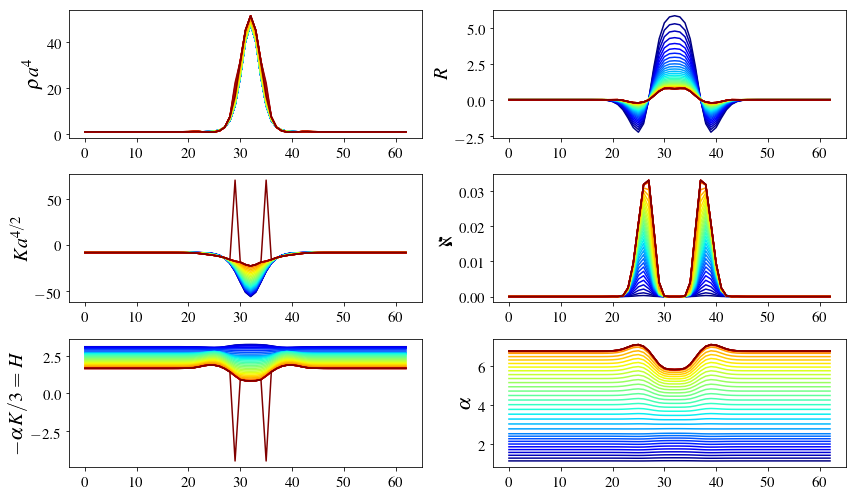

In [13]:
# loading parms
SRuns = fnCRuns
runs_ini = 0
runs_end = 400
runs_iter = 10
runs = np.arange(runs_ini, runs_end + runs_iter, runs_iter)

# plot parms
res = 64
slc = (31, 31)
slcx = (0,-1)
# slcx = (30,35)
#nvar = "rho"


files = []
for r in runs: 
    fn = dfn(path + SRuns, int(r) )
    if os.path.exists(fn):
        files.append(fn)

        
colors = plt.cm.jet(np.linspace(0,1,len(files)))  
        
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,7))
for i_f, file in enumerate(files):
    
    ds = yt.frontends.chombo.ChomboDataset(file)
    reg = ds.r[::res*1j, ::res*1j, ::res*1j]
    
    #a =  np.mean(  reg['chi'][:, slc[0], slc[1]]**-0.5  )
    a =    reg['chi'][slcx[0]:slcx[1], slc[0], slc[1]]**-0.5  
    
    ax = axs[0, 0]
    nvar = 'rho'
    var = reg[nvar][slcx[0]:slcx[1], slc[0], slc[1]] 
    var = var * a**4
#     var = var/var.max()    
    ax.plot(var, color = colors[i_f])
    ax.set_ylabel(r"$\rho a^{4} $")
    
    ax = axs[1, 0]
    nvar = 'K'
    var = reg[nvar][slcx[0]:slcx[1], slc[0], slc[1]]   * a**(4/2)
#     var =0var/var.max()    
    ax.plot(var, color = colors[i_f])
    ax.set_ylabel(r"$K  a^{4/2} $")
    
    ax = axs[2, 0]
#     nvar = 'lapse'
#     var = reg[nvar][slcx[0]:slcx[1], slc[0], slc[1]] 
    K = reg["K"][slcx[0]:slcx[1], slc[0], slc[1]] 
    lapse = reg["lapse"][slcx[0]:slcx[1], slc[0], slc[1]] 
    var = - lapse * K / 3
#     var = var - np.mean(var)
#     var = var/var.max()    
    ax.plot(var, color = colors[i_f])
    ax.set_ylabel(r"$\alpha - \langle\alpha\rangle$")
    ax.set_ylabel(r"$-\alpha K /3 = H$")
    
    
    
    
    
    
    ax = axs[0, 1]
    nvar = 'ricci_scalar'
    var = reg[nvar][slcx[0]:slcx[1], slc[0], slc[1]] 
#     var = var * a**3
#     var = var/var.max()    
    ax.plot(var, color = colors[i_f])
    ax.set_ylabel(r"$ R $")
    
    ax = axs[1, 1]
    nvar = 'trA2'
    var = reg[nvar][slcx[0]:slcx[1], slc[0], slc[1]]  
#     var = var * a**(-3/2)
#     var = var/var.max()    
    ax.plot(var, color = colors[i_f])
    ax.set_ylabel(r"$ \aleph $")


#     ax = axs[1, 1]
#     var = reg["S"][slcx[0]:slcx[1], slc[0], slc[1]]  / reg["rho"][slcx[0]:slcx[1], slc[0], slc[1]] /3
# #     var = var * a**(-3/2)
# #     var = var/var.max()    
#     ax.plot(var, color = colors[i_f])
#     ax.set_ylabel(r"$ \omega $")
    
    
#     ax = axs[1, 1]
#     nvar = 'K'
#     var =  - (reg[nvar][slcx[0]:slcx[1], slc[0], slc[1]] )
# #     var = var * a**(-3/2)
#     ax.plot(var, color = colors[i_f])
#     ax.set_yscale("log")
#     ax.set_ylabel(r"$K$")
    
    
    
    
    ax = axs[2, 1]
    nvar = 'lapse'
    var = reg[nvar][slcx[0]:slcx[1], slc[0], slc[1]] 
#     var = var - np.mean(var)
#     var = var/var.max()    
    ax.plot(var, color = colors[i_f])
    ax.set_ylabel(r"$\alpha$")
    
    
    

plt.tight_layout()
plt.savefig(path+'prev_plot.png')
plt.show()
    
    
    


In [8]:
print(files[-3:])
del ds

['/home/cjoana/myGRChombo_runs/PBH/out/test/t64_n_000600.3d.hdf5', '/home/cjoana/myGRChombo_runs/PBH/out/test/t64_n_000620.3d.hdf5', '/home/cjoana/myGRChombo_runs/PBH/out/test/t64_n_000640.3d.hdf5']
